In [1]:
import os
import fiona
from matplotlib import pyplot as plt
%matplotlib inline

input_file = os.path.join(os.path.abspath('..'), 'examples', 'nybb_15b', 'nybb.shp')
if os.path.exists(input_file):
    print('Input file:', input_file)
else:
    print('Please download the tutorial data or fix the path!')

('Input file:', '/Users/kjordahl/scipy2015/geospatial_tutorial/examples/nybb_15b/nybb.shp')


## Part 1

Use the command line tool `fio` to explore this file. Although it is possible do this with `!fio` in this notebook, I recommend using a terminal window (command shell).

- How many features are there in the file?
- What is the coordinate reference system?

## Part 2

Load the `input_file` with Fiona in python.

- What type of geometries are in each feature?
- What `properties` are on each feature?

(Hint: each feature is a dictionary.)

In [2]:
with fiona.open(input_file) as src:
    f = src.next()
    print(f['geometry']['type'])
    print(f['properties'])

MultiPolygon
OrderedDict([(u'BoroCode', 5), (u'BoroName', u'Staten Island'), (u'Shape_Leng', 330466.075042), (u'Shape_Area', 1623827185.9)])


## BONUS

Look at the `coordinates` of the first geometry. The structures here are nested, but ultimately you can get down to the x, y pairs that make up each part of the geometry. Try separating out parts of the geometry to plot them.

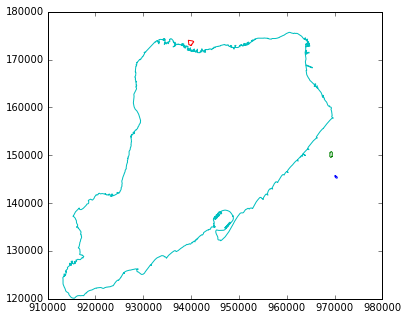

In [3]:
plt.figure(figsize=(6, 6))
for coords in f['geometry']['coordinates']:
    # just plot the outer ring of each polygon for now
    x, y = zip(*coords[0])
    plt.plot(x, y)
plt.gca().set_aspect('equal')